In [49]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

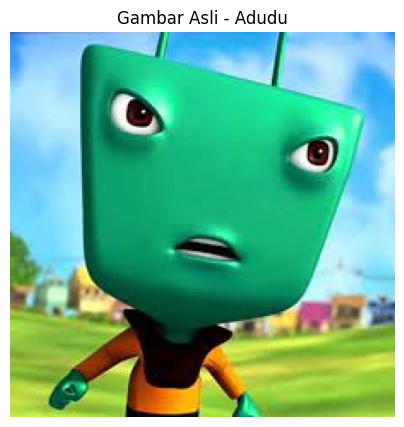

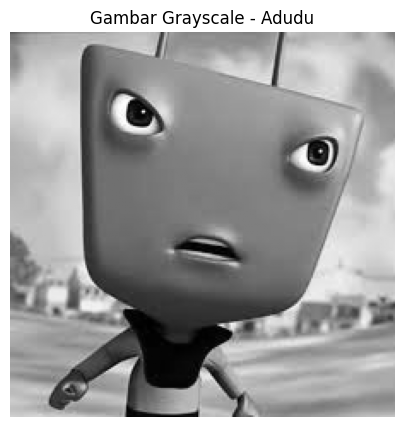

In [50]:
# Fungsi untuk menampilkan gambar
def show_img(title, img, cmap_type='gray'):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load gambar Adudu
image = cv2.imread('Assets/adudu.jpg')

# Konversi ke RGB (biar warna sesuai saat ditampilkan di matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show_img("Gambar Asli - Adudu", image_rgb, cmap_type=None)

# Konversi ke Grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_img("Gambar Grayscale - Adudu", image_gray)


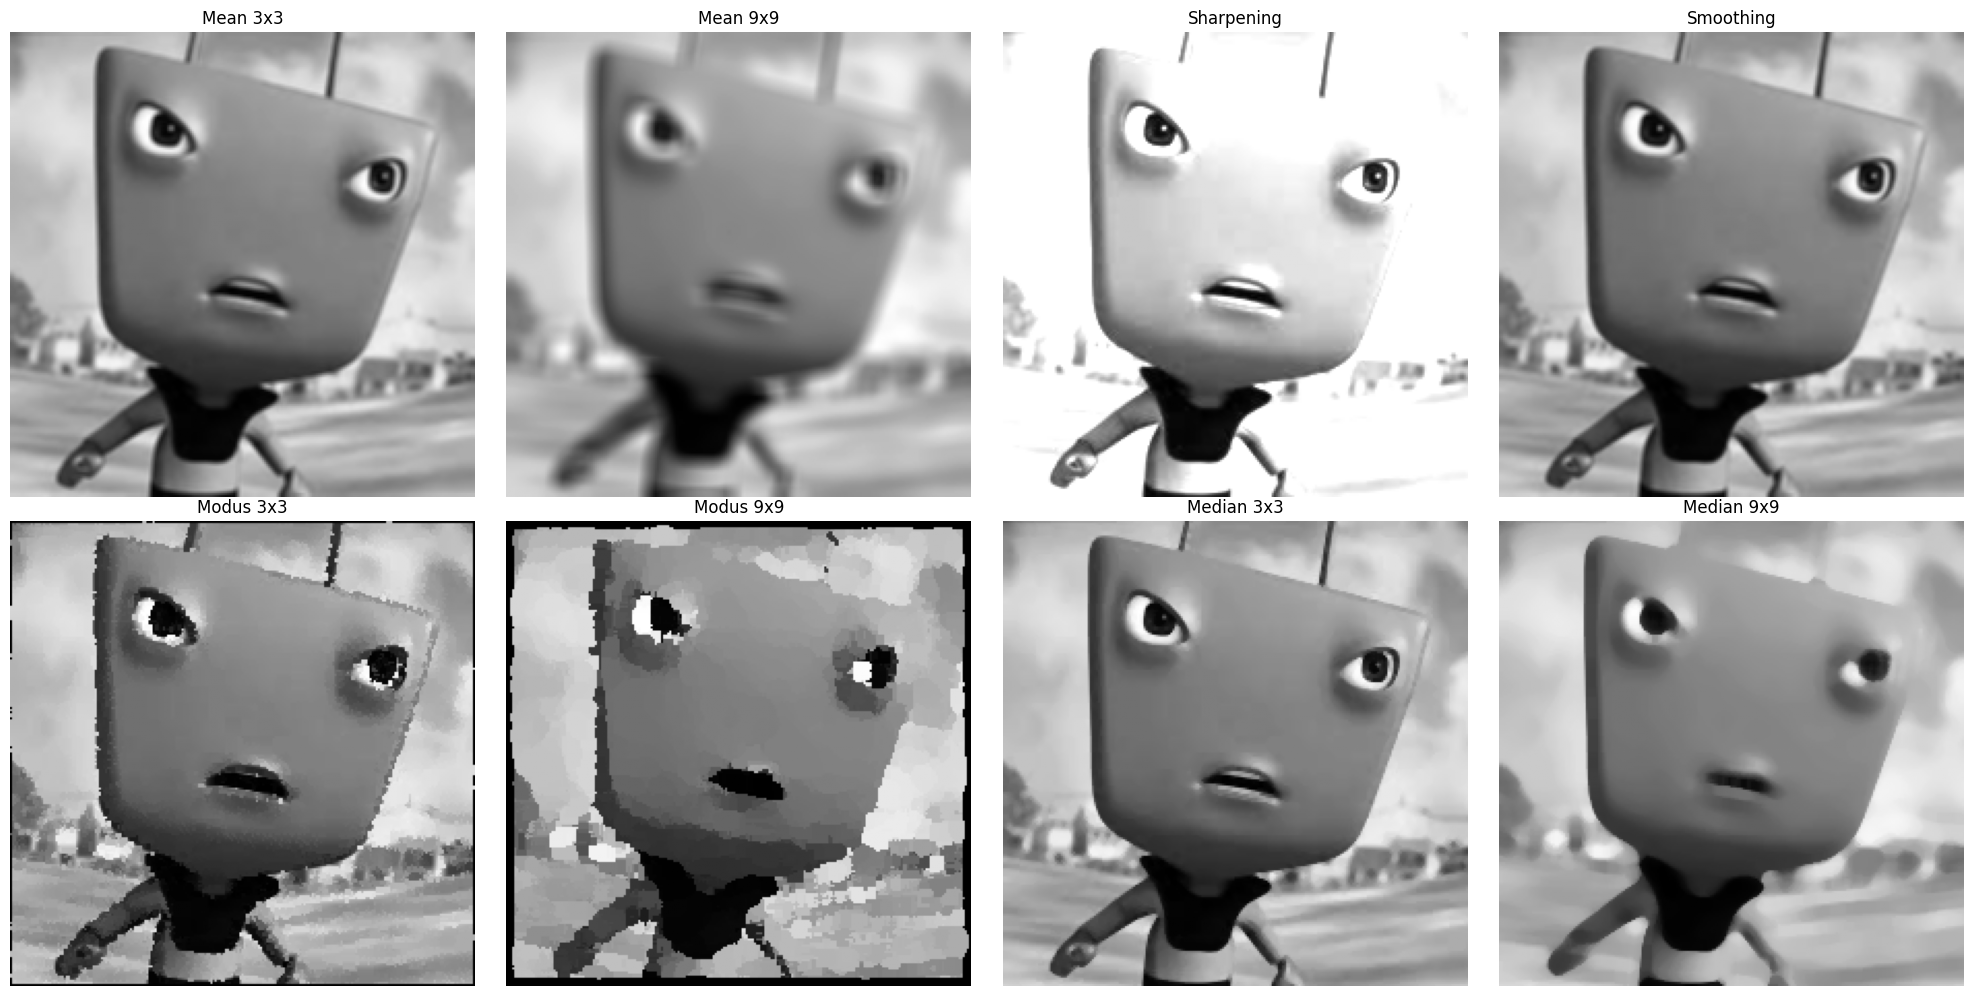

In [51]:
# Fungsi Modus Filter
def mode_filter(img, ksize):
    pad_size = ksize // 2
    padded_img = np.pad(img, pad_size, mode='constant', constant_values=0)
    output_img = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            window = padded_img[i:i+ksize, j:j+ksize].flatten()
            counts = np.bincount(window)
            mode_val = np.argmax(counts)
            output_img[i, j] = mode_val
    return output_img

# Baca gambar dan ubah ke grayscale
image = cv2.imread('Assets/adudu.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Kernel smoothing dan sharpening
kernel_smoothing = np.array([[1/10, 1/10, 1/10],
                             [1/10, 1/5,  1/10],
                             [1/10, 1/10, 1/10]], dtype=np.float32)

kernel_sharpening = np.array([[1/9, 1/9, 1/9],
                              [1/9, 8/9, 1/9],
                              [1/9, 1/9, 1/9]], dtype=np.float32)

# Apply smoothing dan sharpening
smoothed_image = cv2.filter2D(image_gray, -1, kernel_smoothing)
sharpened_image = cv2.filter2D(image_gray, -1, kernel_sharpening)

# Apply Mean filter
mean_3x3 = cv2.blur(image_gray, (3,3))
mean_9x9 = cv2.blur(image_gray, (9,9))

# Apply Median filter
median_3x3 = cv2.medianBlur(image_gray, 3)
median_9x9 = cv2.medianBlur(image_gray, 9)

# Apply Modus filter
modus_3x3 = mode_filter(image_gray, 3)
modus_9x9 = mode_filter(image_gray, 9)

# Tampilkan hasil sesuai grid soal
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
plt.imshow(mean_3x3, cmap='gray')
plt.title("Mean 3x3")
plt.axis('off')

plt.subplot(2,4,2)
plt.imshow(mean_9x9, cmap='gray')
plt.title("Mean 9x9")
plt.axis('off')

plt.subplot(2,4,3)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpening")
plt.axis('off')

plt.subplot(2,4,4)
plt.imshow(smoothed_image, cmap='gray')
plt.title("Smoothing")
plt.axis('off')

plt.subplot(2,4,5)
plt.imshow(modus_3x3, cmap='gray')
plt.title("Modus 3x3")
plt.axis('off')

plt.subplot(2,4,6)
plt.imshow(modus_9x9, cmap='gray')
plt.title("Modus 9x9")
plt.axis('off')

plt.subplot(2,4,7)
plt.imshow(median_3x3, cmap='gray')
plt.title("Median 3x3")
plt.axis('off')

plt.subplot(2,4,8)
plt.imshow(median_9x9, cmap='gray')
plt.title("Median 9x9")
plt.axis('off')

plt.tight_layout()
plt.show()
